<a href="https://colab.research.google.com/github/jtao22/PythonAI/blob/main/lab5/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
#import
%matplotlib  inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  pandas.plotting  import  scatter_matrix
from sklearn.model_selection import train_test_split as tts
from  sklearn.model_selection import StratifiedShuffleSplit as SSS
from  sklearn.linear_model import LogisticRegression as LR
from  sklearn.metrics import jaccard_score as jc 
from  sklearn.metrics import f1_score as f1
sns.set_style("darkgrid")
pd.set_option('display.max_columns', None)

#Upload data

In [ ]:
from google.colab import files 
files.upload()

In [9]:
data = pd.read_csv('auto.csv')
data.head(5)

,Unnamed: 0,wheel-base,length,width,curb-weight,num-of-cylinders,engine-size,bore,horsepower,city-mpg,highway-mpg,price,price-range,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd
0,0,-1.680910,-0.438315,-0.851335,-0.014821,-0.342804,0.075201,0.519650,0.222401,-0.650624,-0.540937,0.036224,<20k,1,0,0,0,0,0,0,1
1,1,-1.680910,-0.438315,-0.851335,-0.014821,-0.342804,0.075201,0.519650,0.222401,-0.650624,-0.540937,0.414350,<20k,1,0,0,0,0,0,0,1
2,2,-0.708334,-0.243544,-0.185134,0.516789,1.544965,0.604724,-2.427321,1.334146,-0.961995,-0.687669,0.414350,<20k,0,0,1,0,0,0,0,1
3,3,0.165335,0.194690,0.147966,-0.422710,-0.342804,-0.430252,-0.524846,-0.010290,-0.183569,-0.100741,0.093477,<20k,0,0,0,1,0,0,1,0
4,4,0.099398,0.194690,0.243137,0.518722,0.601081,0.219617,-0.524846,0.325819,-1.117680,-1.274597,0.533891,<20k,0,0,0,1,0,1,0,0


In [10]:
data = data.drop(columns=['Unnamed: 0', 'price'],axis=1)

In [11]:
data.head(5)

,wheel-base,length,width,curb-weight,num-of-cylinders,engine-size,bore,horsepower,city-mpg,highway-mpg,price-range,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd
0,-1.680910,-0.438315,-0.851335,-0.014821,-0.342804,0.075201,0.519650,0.222401,-0.650624,-0.540937,<20k,1,0,0,0,0,0,0,1
1,-1.680910,-0.438315,-0.851335,-0.014821,-0.342804,0.075201,0.519650,0.222401,-0.650624,-0.540937,<20k,1,0,0,0,0,0,0,1
2,-0.708334,-0.243544,-0.185134,0.516789,1.544965,0.604724,-2.427321,1.334146,-0.961995,-0.687669,<20k,0,0,1,0,0,0,0,1
3,0.165335,0.194690,0.147966,-0.422710,-0.342804,-0.430252,-0.524846,-0.010290,-0.183569,-0.100741,<20k,0,0,0,1,0,0,1,0
4,0.099398,0.194690,0.243137,0.518722,0.601081,0.219617,-0.524846,0.325819,-1.117680,-1.274597,<20k,0,0,0,1,0,1,0,0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


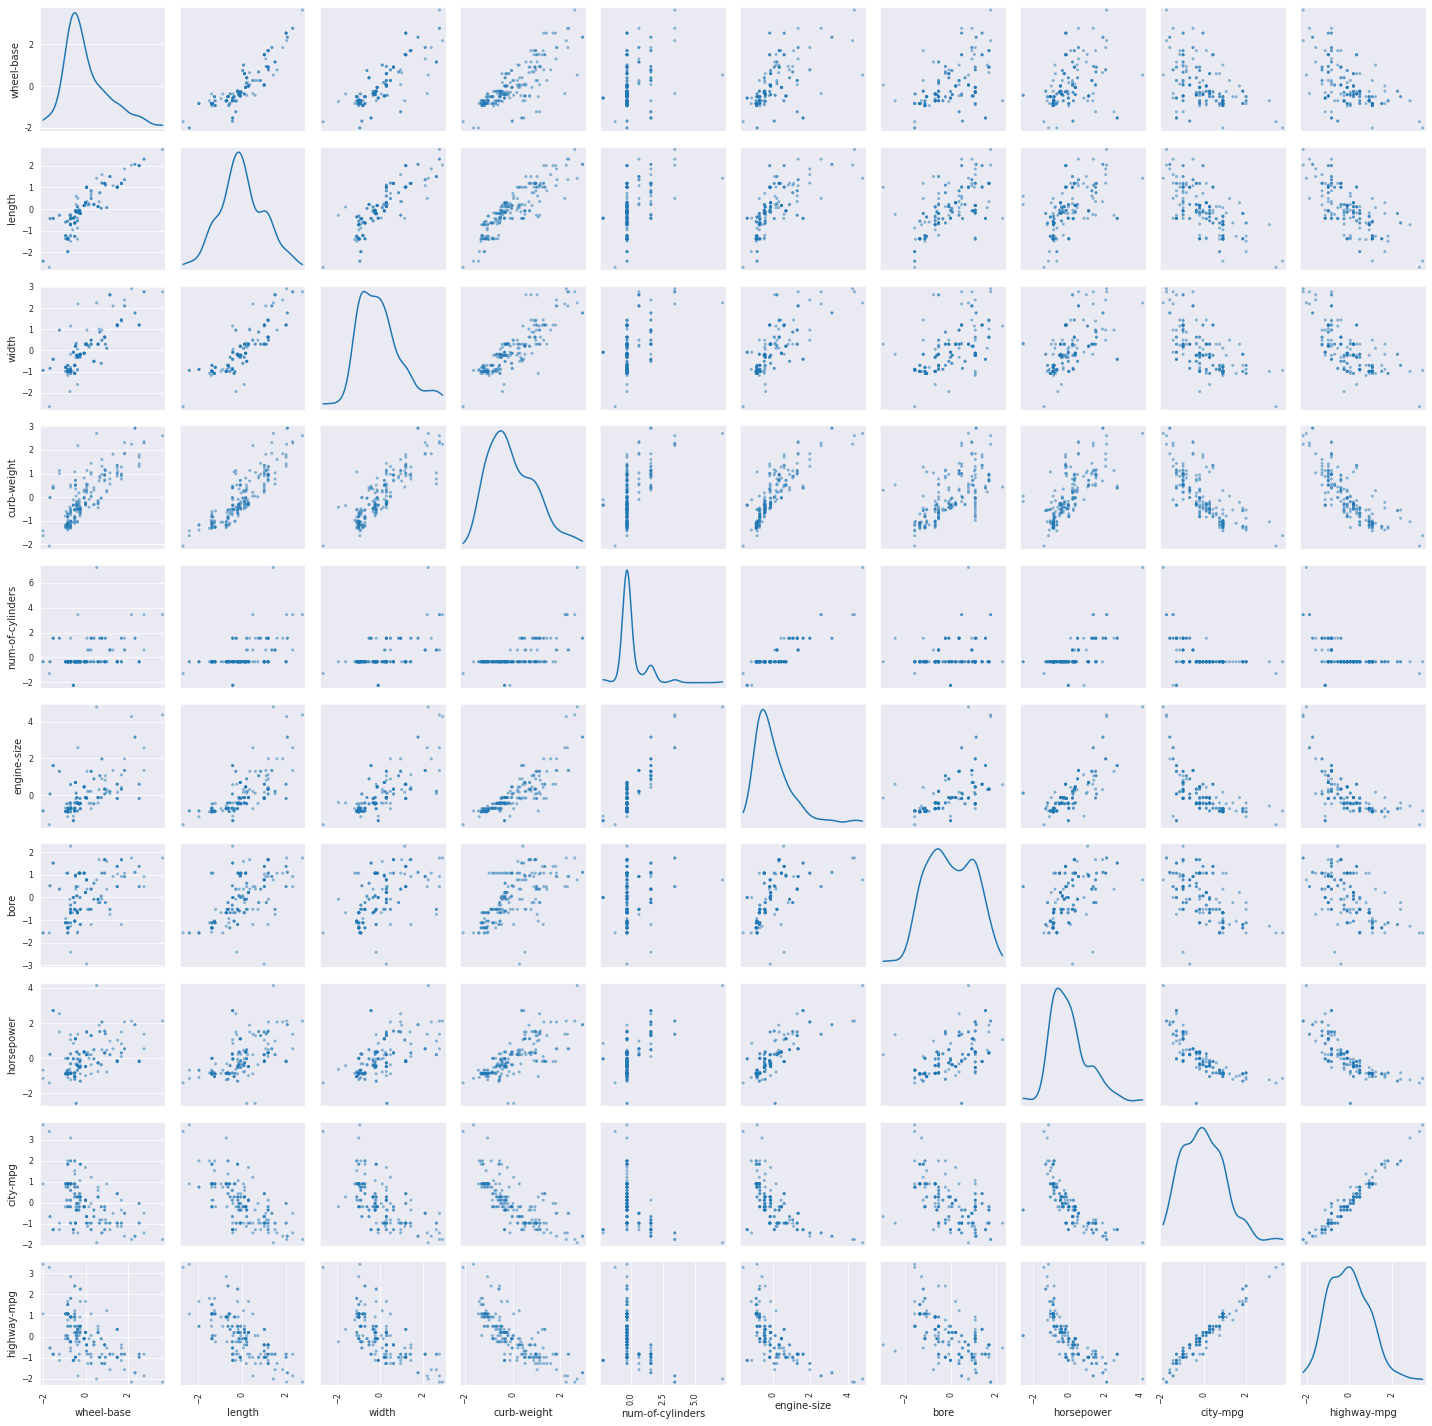

In [17]:
fig = plt.figure(figsize=(20,20))
plot = fig.add_subplot(1,1,1)
scatter_matrix(data[['wheel-base','length','width','curb-weight','num-of-cylinders','engine-size','bore','horsepower','city-mpg','highway-mpg']], ax=plot, diagonal='kde', grid=True)
plt.tight_layout()

In [19]:
train,test = tts(data,test_size=0.2,random_state=42)
print(train.shape, ', ', test.shape)

(160, 19) ,  (41, 19)


In [23]:
print('\n Training set: \n')
print(train['num-of-cylinders'].value_counts()/len(train))
print('\n Test set: \n')
print(test['num-of-cylinders'].value_counts()/len(test))


 Training set: 

-0.342804    0.80625
 1.544965    0.11250
 0.601081    0.03750
-2.230573    0.01875
 3.432734    0.01250
 7.208272    0.00625
-1.286688    0.00625
Name: num-of-cylinders, dtype: float64

 Test set: 

-0.342804    0.682927
 1.544965    0.146341
 0.601081    0.097561
 3.432734    0.048780
-2.230573    0.024390
Name: num-of-cylinders, dtype: float64


In [24]:
data['num-of-cylinders'].value_counts()

-0.342804    157
 1.544965     24
 0.601081     10
 3.432734      4
-2.230573      4
 7.208272      1
-1.286688      1
Name: num-of-cylinders, dtype: int64

In [25]:
data['num-of-cylinders'].value_counts().index.tolist()

[-0.3428038246190091,
 1.5449651821870396,
 0.6010806787840153,
 3.432734188993088,
 -2.2305728314250577,
 7.208272202605187,
 -1.2866883280220334]

In [27]:
data.drop(index=data.loc[data['num-of-cylinders']==7.208272202605187].index, axis=1, inplace=True)
data.drop(index=data.loc[data['num-of-cylinders']==-1.2866883280220334].index, axis=1, inplace=True)
data.reset_index(inplace=True)
data['num-of-cylinders'].value_counts()

-0.342804    157
 1.544965     24
 0.601081     10
 3.432734      4
-2.230573      4
Name: num-of-cylinders, dtype: int64

In [30]:
split = SSS(n_splits=1, test_size=0.2, random_state=346)
for trainI,testI in split.split(data,data['num-of-cylinders']):
  sTrain = data.loc[trainI]
  sTest = data.loc[testI]

print('\n Training set: \n')
print(sTrain['num-of-cylinders'].value_counts()/len(sTrain))
print('\n Test set: \n')
print(sTest['num-of-cylinders'].value_counts()/len(sTest))


 Training set: 

-0.342804    0.792453
 1.544965    0.119497
 0.601081    0.050314
 3.432734    0.018868
-2.230573    0.018868
Name: num-of-cylinders, dtype: float64

 Test set: 

-0.342804    0.775
 1.544965    0.125
 0.601081    0.050
 3.432734    0.025
-2.230573    0.025
Name: num-of-cylinders, dtype: float64


In [46]:
trainX, testX = sTrain.drop('price-range',axis=1),sTest.drop('price-range',axis=1)
trainY, testY = sTrain['price-range'], sTest['price-range']


In [47]:
lr = LR(solver='newton-cg')
lr.fit(trainX,trainY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
predictions = lr.predict(testX)

In [49]:
print('Logistic Regression F1-Score: %0.2f' % f1(testY, predictions, pos_label='>=20k'))
print('Logistic Regression Jaccard Score: %0.2f' % jc(testY, predictions, pos_label='>=20k'))

Logistic Regression F1-Score: 1.00
Logistic Regression Jaccard Score: 1.00


###K Neighbors Classifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier as KNC
for i in range(1,15):
  knc = KNC(n_neighbors= i)
  knc.fit(trainX,trainY)
  predictions = knc.predict(testX)
  print('Number of neighbors:', i)
  print('KNC F1-Score: %0.2f' % f1(testY, predictions, pos_label='>=20k'))
  print('KNC Jaccard Score: %0.2f' % jc(testY, predictions, pos_label='>=20k'))
  print()

Number of neighbors: 1
KNC F1-Score: 1.00
KNC Jaccard Score: 1.00

Number of neighbors: 2
KNC F1-Score: 1.00
KNC Jaccard Score: 1.00

Number of neighbors: 3
KNC F1-Score: 1.00
KNC Jaccard Score: 1.00

Number of neighbors: 4
KNC F1-Score: 1.00
KNC Jaccard Score: 1.00

Number of neighbors: 5
KNC F1-Score: 1.00
KNC Jaccard Score: 1.00

Number of neighbors: 6
KNC F1-Score: 1.00
KNC Jaccard Score: 1.00

Number of neighbors: 7
KNC F1-Score: 1.00
KNC Jaccard Score: 1.00

Number of neighbors: 8
KNC F1-Score: 1.00
KNC Jaccard Score: 1.00

Number of neighbors: 9
KNC F1-Score: 1.00
KNC Jaccard Score: 1.00

Number of neighbors: 10
KNC F1-Score: 0.67
KNC Jaccard Score: 0.50

Number of neighbors: 11
KNC F1-Score: 0.67
KNC Jaccard Score: 0.50

Number of neighbors: 12
KNC F1-Score: 0.00
KNC Jaccard Score: 0.00

Number of neighbors: 13
KNC F1-Score: 0.00
KNC Jaccard Score: 0.00

Number of neighbors: 14
KNC F1-Score: 0.00
KNC Jaccard Score: 0.00



#####It appears that at n_neighbors = 10 the F1 and Jaccard scores start to go down

###SVC

In [55]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(trainX,trainY)
predictions = svc.predict(testX)
print('SVC F1-Score: %0.2f' % f1(testY, predictions, pos_label='>=20k'))
print('SVC Jaccard Score: %0.2f' % jc(testY, predictions, pos_label='>=20k'))

SVC F1-Score: 0.89
SVC Jaccard Score: 0.80


#Gaussian Naive Bayes 

In [56]:
from sklearn.naive_bayes import GaussianNB as GNB
gnb = GNB()
gnb.fit(trainX,trainY)
predictions = gnb.predict(testX)
print('GNB F1-Score: %0.2f' % f1(testY, predictions, pos_label='>=20k'))
print('GNB Jaccard Score: %0.2f' % jc(testY, predictions, pos_label='>=20k'))

GNB F1-Score: 0.57
GNB Jaccard Score: 0.40


###Results
| Classifier | Jaccard-score | F1-score |
| --- | --- | --- |
| Logistic Regression |  1.00 | 1.00 |
| K Neighbors Classifier (1-9 neighbors) | 1.00 | 1.00 |
| Support Vector Classifier  | 0.80 | 0.89 |
| Gaussian Naive-Bayes  | 0.40 | 0.57 |